Resources: https://www.kaggle.com/ferneutron/feature-extraction-with-different-methods

## Setting up

In [197]:
import pandas as pd # To handle the data set.
import seaborn as sb # To display visualizations.
import matplotlib.pyplot as plt # To plot
import numpy as np


from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.metrics import confusion_matrix # To calculate the confusion matrix
from sklearn.metrics import accuracy_score # To calculate the score
from sklearn.feature_selection import SelectKBest # Univariate Feature Selection
from sklearn.feature_selection import chi2 # To apply Univariate Feature Selection
from sklearn.feature_selection import RFE # Recursive Feature Selection
from sklearn.feature_selection import RFECV # Recursive Feature Selection with Cross Validation
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA # To apply PCA
from sklearn import preprocessing # To get MinMax Scaler function

# To plot inline
%matplotlib inline

# enable multiple outputs per cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# hide warnings
import warnings
#warnings.filterwarnings('ignore')

In [198]:
df = pd.read_csv('./datasets/feature_extracted.csv'
                 , sep=',', encoding='utf-8')

In [199]:
# change label into binary classification
df.label.loc[(df['label'] >= 0.5)] = 1
df.label.loc[(df['label'] < 0.5)] = 0

In [200]:
# divide into training and test set
df = shuffle(df, random_state=123)
#df_train, df_test = train_test_split(df, test_size=0.2)

X = df.copy().drop(['statement','label'], axis=1)
X = X.fillna(0)
Y = df.copy()['label']
Y = Y.fillna(0)

In [201]:
# remove low variance data
sel_variance_threshold = VarianceThreshold()
#X = sel_variance_threshold.fit_transform(X)

In [202]:
# Initializing the MinMaxScaler function
min_max_scaler = preprocessing.MinMaxScaler()
# Scaling dataset keeping the columns name
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)

In [203]:
# Splitting  up data, seting 75% for train and 25% for test.
x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=43)

## Univariate selection (chi2)

In [204]:
# Initialize SelectKBest function
UnivariateFeatureSelection = SelectKBest(chi2, k=10).fit(x_train, y_train)

In [205]:
# Creating a dict to visualize which features were selected with the highest score
feature_dict = {key:value for (key, value) in zip(
    UnivariateFeatureSelection.scores_, x_train.columns)}
sorted(feature_dict.items())

[(1.7076235409258083e-05, 'count_adj'),
 (7.525910419352411e-05, 'count_sad'),
 (0.00019251846790101554, 'count_adverb'),
 (0.00022637664325695392, 'count_affect'),
 (0.0004750871846395436, 'count_you'),
 (0.00047827396213290273, 'count_article'),
 (0.0009967922512344799, 'count_social'),
 (0.0011659473483277638, 'num_"'),
 (0.001454390877584939, 'count_auxverb'),
 (0.01402962362787873, 'count_anger'),
 (0.023394651803687085, 'count_pronoun'),
 (0.02430712226810696, 'count_negate'),
 (0.0445700043976944, 'num_('),
 (0.047707980997530236, 'num_;'),
 (0.08457529734285085, 'num_.'),
 (0.16578602974558038, 'num_%'),
 (0.19145121141499466, 'num_?'),
 (0.2366445576907206, 'count_char'),
 (0.25216064485705997, 'count_unique'),
 (0.27706849681218926, 'num_-'),
 (0.29435717156691155, 'count_compare'),
 (0.3315982902218048, 'count_function'),
 (0.4068735854362755, 'count_word'),
 (0.4126631914671248, 'count_char_per_word'),
 (0.4213530377466457, 'count_ipron'),
 (0.4377996975190168, 'count_motio

In [206]:
x_train_k_best = UnivariateFeatureSelection.transform(x_train)
x_test_k_best = UnivariateFeatureSelection.transform(x_test)

### Testing with RF

In [207]:
RandForest_K_best = RandomForestClassifier()      
RandForest_K_best = RandForest_K_best.fit(x_train_k_best, y_train)
y_pred = RandForest_K_best.predict(x_test_k_best)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.5646578782172003


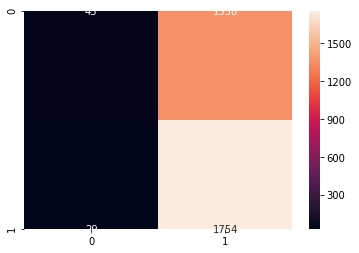

In [208]:
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")

## Anova

In [209]:
# Initialize SelectKBest function


## Recursive Feature Elimination

In [210]:
# Initializing Random Forest Classifier
RandForest_RFE = RandomForestClassifier() 
# Initializing the RFE object, one of the most important arguments is the estimator, in this case is RandomForest
rfe = RFE(estimator=RandForest_RFE, n_features_to_select=5, step=1)
# Fit the origial dataset
rfe = rfe.fit(x_train, y_train)

In [211]:
print("Best features chosen by RFE: \n")
for i in x_train.columns[rfe.support_]:
    print(i)

Best features chosen by RFE: 

count_char
count_char_per_word
count_unique
count_uppercase
sentiment_score


In [212]:
x_train_RFE = rfe.transform(x_train)
x_test_RFE = rfe.transform(x_test)
RandForest_RFE = RandForest_RFE.fit(x_train_RFE, y_train)
y_pred = RandForest_RFE.predict(x_test_RFE)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ',accuracy)

Accuracy:  0.5213433772755807


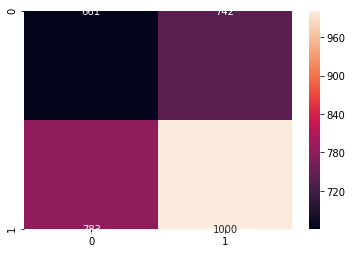

In [213]:
confMatrix = confusion_matrix(y_test, y_pred)
sb.heatmap(confMatrix, annot=True, fmt="d")

## Recursive Feature Elimination with Cross-Validation

In [214]:
# Initialize the Random Forest Classifier
RandForest_RFECV = RandomForestClassifier() 
# Initialize the RFECV function setting 3-fold cross validation
rfecv = RFECV(estimator=RandForest_RFECV, step=1, cv=3, scoring='accuracy')
# Fit data
rfecv = rfecv.fit(x_train, y_train)

print('Best number of features :', rfecv.n_features_)
print('Features :\n')
for i in x_train.columns[rfecv.support_]:
    print(i)

Best number of features : 39
Features :

num_-
num_"
num_(
num_$
num_,
num_.
count_char
count_word
count_char_per_word
count_unique
count_uppercase
sentiment_score
count_pronoun
count_shehe
count_they
count_ipron
count_compare
count_interrog
count_number
count_anx
count_insight
count_cause
count_discrep
count_tentat
count_certain
count_hear
count_health
count_ingest
count_affiliation
count_risk
count_focuspast
count_work
count_leisure
count_money
count_death
count_informal
count_swear
count_assent
count_nonflu


<Figure size 432x288 with 0 Axes>

Text(0.5, 0, 'Number of Features')

Text(0, 0.5, 'Score of Selected Features')

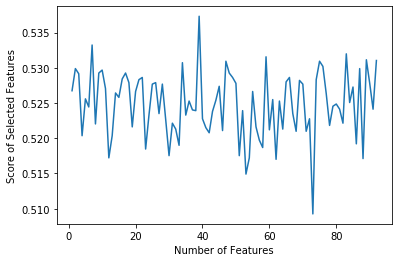

In [215]:
plt.figure()
plt.xlabel("Number of Features")
plt.ylabel("Score of Selected Features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

## Tree based Feature Selection

In [216]:
# Initialize the Random Forest Classifier
RandForest_Tree = RandomForestClassifier()  
# Fit the random forest with the original data
RandForest_Tree = RandForest_Tree.fit(x_train, y_train)
# Getting the relevance between features
relevants = RandForest_Tree.feature_importances_

In [217]:
# Apply the tree based on importance for the random forest classifier and indexing it
std = np.std([tree.feature_importances_ for tree in RandForest_Tree.estimators_], axis=0)
indices = np.argsort(relevants)[::-1]

In [218]:
# Printting the ranking of importance
print("Feature Rank:")

for i in range(x_train.shape[1]):
    print("%d. Feature %d (%f)" 
          % (i + 1, indices[i], relevants[indices[i]]))

Feature Rank:
1. Feature 14 (0.118229)
2. Feature 11 (0.112848)
3. Feature 18 (0.079586)
4. Feature 15 (0.074113)
5. Feature 12 (0.072821)
6. Feature 16 (0.069336)
7. Feature 26 (0.036131)
8. Feature 10 (0.030730)
9. Feature 9 (0.027632)
10. Feature 86 (0.023497)
11. Feature 0 (0.020301)
12. Feature 36 (0.015416)
13. Feature 8 (0.014657)
14. Feature 64 (0.013731)
15. Feature 7 (0.011507)
16. Feature 83 (0.011203)
17. Feature 38 (0.010652)
18. Feature 72 (0.009512)
19. Feature 73 (0.009031)
20. Feature 81 (0.008905)
21. Feature 6 (0.008353)
22. Feature 54 (0.008345)
23. Feature 80 (0.008001)
24. Feature 37 (0.007815)
25. Feature 68 (0.007592)
26. Feature 52 (0.007526)
27. Feature 20 (0.007460)
28. Feature 56 (0.007113)
29. Feature 66 (0.007046)
30. Feature 89 (0.006963)
31. Feature 25 (0.006199)
32. Feature 70 (0.005750)
33. Feature 90 (0.005719)
34. Feature 39 (0.005634)
35. Feature 24 (0.005583)
36. Feature 60 (0.005491)
37. Feature 85 (0.005356)
38. Feature 87 (0.005308)
39. Feature 

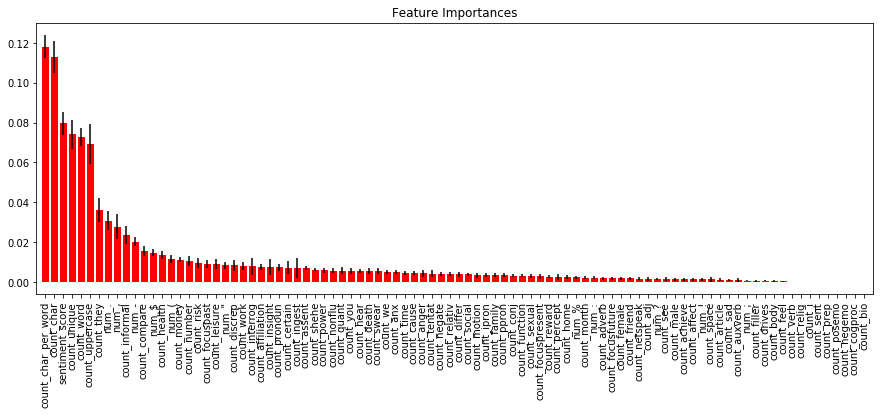

In [219]:
# Plotting the feature importances
plt.figure(1, figsize=(15, 5))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), relevants[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show();

## Feature Extraction through PCA

In [220]:
# Initializing PCA and fitting
pca = PCA()
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

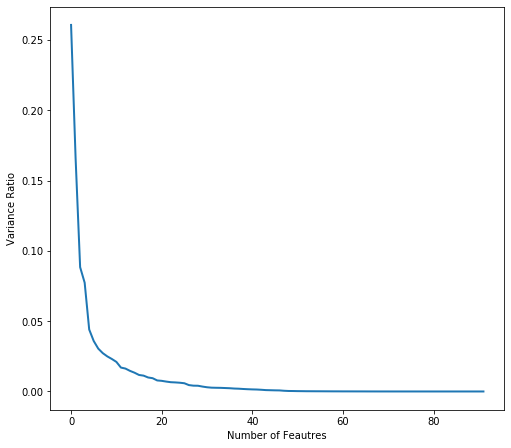

In [221]:
# Plotting to visualize the best number of elements
plt.figure(1, figsize=(9, 8))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('Number of Feautres')
plt.ylabel('Variance Ratio')
plt.show();